# General Assembly DSI 13 EC 
# Project 3 - Web APIs & NLP
## Mike Bell 
### October 23, 2020

## Notebook 3: Exploratory Data Analysis

Here we do some basic EDA on our reddit post text dataset: We plot basis statistics/distributions about word count and post lengths for each subreddit, and then examine the most frequently used words and bigrams for each. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

%matplotlib inline
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 10000)

In [2]:
subreddits = [ 'math', 'physics']

subreddit_dir = f'../data/{subreddits[0]}_{subreddits[1]}_data/'

In [3]:
df = pd.read_csv(f'{subreddit_dir}{subreddits[0]}_{subreddits[1]}_combined_lem.csv', keep_default_na = False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      2140 non-null   object
 1   selftext   2140 non-null   object
 2   text       2140 non-null   object
 3   lem_text   2140 non-null   object
 4   subreddit  2140 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 83.7+ KB


# Basic post length statistics

Let's make some new statistics columns for the text in each post namely the number of characters (length) and word count (count), and get some basic statistics about each subreddit.


In [5]:
df['length'] = df['text'].str.len()
df['count'] = df['text'].map(lambda x : len(x.split()))
df_0 = df[df['subreddit'] == 0]
df_1 = df[df['subreddit'] == 1]

In [6]:
df_0.describe()

,subreddit,length,count
count,1057.0,1057.000000,1057.00000
mean,0.0,338.568590,48.02649
std,0.0,431.280835,59.62094
min,0.0,6.000000,1.00000
25%,0.0,95.000000,14.00000
50%,0.0,218.000000,31.00000
75%,0.0,427.000000,60.00000
max,0.0,4850.000000,653.00000


In [7]:
df_1.describe()

,subreddit,length,count
count,1083.0,1083.000000,1083.000000
mean,1.0,243.456140,34.007387
std,0.0,516.748939,76.382392
min,1.0,4.000000,1.000000
25%,1.0,55.000000,7.500000
50%,1.0,135.000000,19.000000
75%,1.0,295.000000,40.500000
max,1.0,14210.000000,2162.000000


We see that physics posts are on average shorter than math posts (averages of 321 for math, and 255 for physics), and that both subreddits have some large outliers in terms of post lengths. 

In [8]:
# We have some posts with massively long text.. let's look at them

df[df.length > 4000]

,title,selftext,text,lem_text,subreddit,length,count
75,paleolithic math ethno math understanding isha...,researching ishango lebombo bones widely under...,paleolithic math ethno math understanding isha...,paleolithic math ethno math understanding isha...,0,4434,541
722,humble probably misguided investigation connec...,hi last night decided start watching youtube v...,humble probably misguided investigation connec...,humble probably misguided investigation connec...,0,4850,653
2107,oak stone physics riddle draft looking suggest...,black screen first person view opens eyes old ...,oak stone physics riddle draft looking suggest...,oak stone physic riddle draft looking suggesti...,1,14210,2162


In [9]:
df.loc[722,'text']

'humble probably misguided investigation connections additive identity non standard analysis hi last night decided start watching youtube video yes bored notion something unfamiliar already convinced multiple arguments drawn comments section unsurprisingly number dumbfounded people arguing concept decided try explain principle saw using perhaps clumsy visual metaphor trying zoom line able see difference emerge two ostensible points matter scale one zoomed course speaking rigorously math triggering fuck enthusiasts professionals alike attempted draft response would rigorously outline trying express turned much depth consideration topic originally planned decided going torn shreds something something actually represents something reasoning intuition comes math become aware gotchas way present topic would stand learn mainly course started draw connections subjects math interested like non standard analysis probably much controversial could stand someone knowledgeable subject review hope f

### I suppose these seem on-topic, let's leave them in ..

Let's now plot the distribution of post length/word count by subreddit, and look at boxplots of the above stats.

### Post Length (character counts)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'post length')

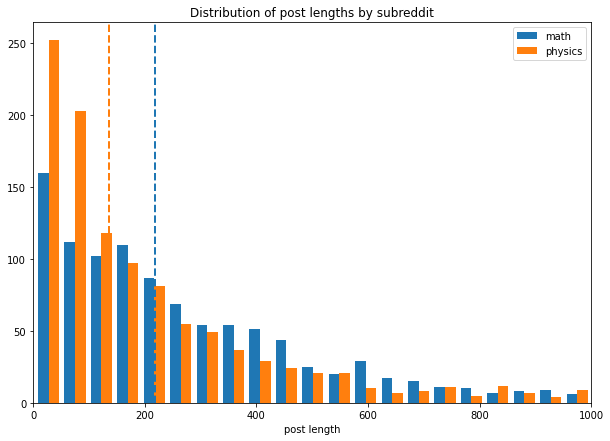

In [10]:
plt.figure(figsize = (10,7))
plt.hist([df_0['length'], df_1['length']], bins = 300, label=['math', 'physics'])
plt.axvline(df_0['length'].median(), color='C0', linestyle='dashed', linewidth=2)
plt.axvline(df_1['length'].median(), color='C1', linestyle='dashed', linewidth=2)
plt.xlim([0,1000])
plt.legend()
plt.title('Distribution of post lengths by subreddit')
plt.xlabel('post length')

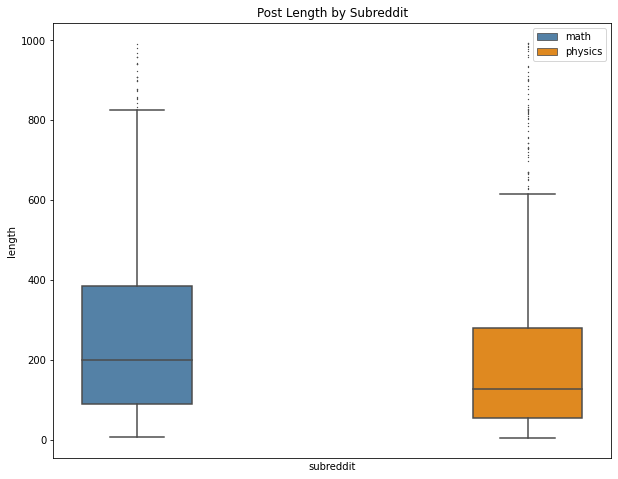

In [11]:
plt.figure(figsize = (10,8))
ax = sns.boxplot( x = 'subreddit', y="length", hue="subreddit", data=df[df['length'] < 1000], palette = {0:'steelblue', 1: 'darkorange'}, fliersize=0.5)
plt.title('Post Length by Subreddit')
handles, _ = ax.get_legend_handles_labels()
plt.xticks([])
ax.legend(handles, ["math", "physics"])

## Word Counts

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'Word Count')

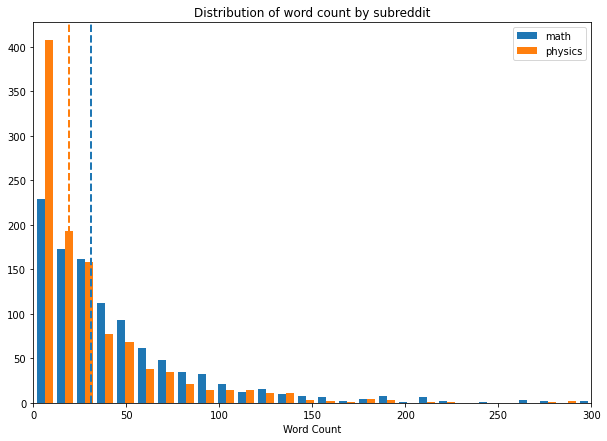

In [12]:
plt.figure(figsize = (10,7))
plt.hist([df_0['count'], df_1['count']], bins = 200, label=['math', 'physics'])
plt.xlim([0,300])
plt.legend()
plt.axvline(df_0['count'].median(), color='C0', linestyle='dashed', linewidth=2)
plt.axvline(df_1['count'].median(), color='C1', linestyle='dashed', linewidth=2)
plt.title('Distribution of word count by subreddit')
plt.xlabel('Word Count')

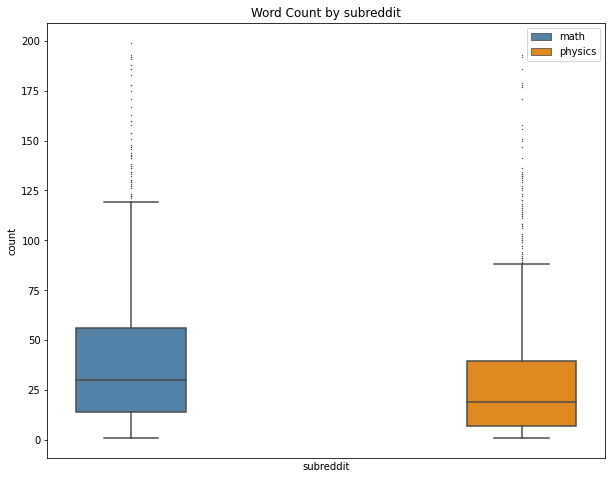

In [13]:
plt.figure(figsize = (10,8))
ax = sns.boxplot( x = 'subreddit', y="count", hue="subreddit", data=df[df['count'] < 200], palette = {0:'steelblue', 1: 'darkorange'}, fliersize=0.5)
plt.title('Word Count by subreddit')
handles, _ = ax.get_legend_handles_labels()
plt.xticks([])
ax.legend(handles, ["math", "physics"])

# Common word/bigram analysis

We use countvectorizer to determine which words and bigrams are used most frequently in both subreddits. 

In [14]:
max_words = 30 # how many of the top words to plot

In [46]:
# Let's use count vectorizer to get word frequency statistics
cvec = CountVectorizer(stop_words = 'english')

Text(0.5, 1.0, 'r/math 30 most common (lemmatized) words')

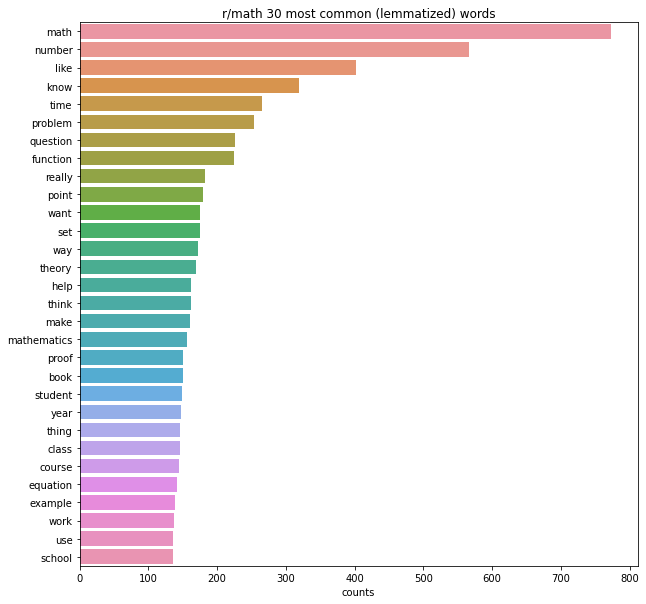

In [47]:
# Top math words
math_words = df_0['lem_text']
math_words = cvec.fit_transform(df_0['lem_text'])
math_words = pd.DataFrame(math_words.todense(), 
                          columns=cvec.get_feature_names())

top_math_words = pd.DataFrame(math_words.sum().sort_values(ascending=False).head(max_words), columns = ['counts'])

plt.figure(figsize = (10,10))
sns.set_color_codes("pastel")
sns.barplot(data=top_math_words, y = top_math_words.index, x = 'counts')
plt.title('r/math 30 most common (lemmatized) words')

In [17]:
top_math_words

,counts
math,773
number,567
like,402
know,319
time,265
problem,253
question,226
function,224
really,183
point,179


Text(0.5, 1.0, 'r/physics 30 most common (lemmatized) words')

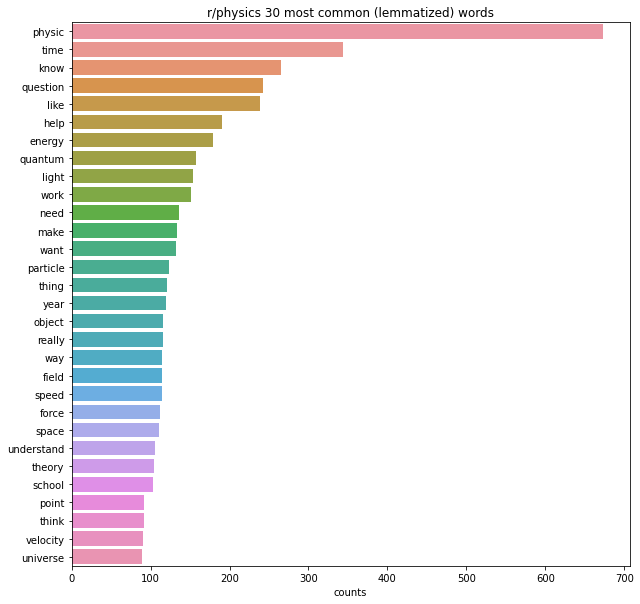

In [48]:
# Top physics words
physics_words = df_1['lem_text']
physics_words = cvec.fit_transform(df_1['lem_text'])
physics_words = pd.DataFrame(physics_words.todense(), 
                          columns=cvec.get_feature_names())

top_physics_words = pd.DataFrame(physics_words.sum().sort_values(ascending=False).head(max_words), columns = ['counts'])

plt.figure(figsize = (10,10))
sns.set_color_codes("pastel")
sns.barplot(data=top_physics_words, y = top_physics_words.index, x = 'counts')
plt.title('r/physics 30 most common (lemmatized) words')

In [19]:
top_physics_words

,counts
physic,673
time,344
know,265
question,242
like,238
help,191
energy,179
quantum,157
light,154
work,151


In [20]:
# Lets look at which words they have in common / difference 

In [49]:
list(set(top_physics_words.index) & set(top_math_words.index))

['want',
 'know',
 'theory',
 'thing',
 'school',
 'help',
 'work',
 'time',
 'question',
 'think',
 'point',
 'year',
 'way',
 'make',
 'really',
 'like']

In [50]:
list(set(top_math_words.index).difference(set(top_physics_words.index)))

['example',
 'mathematics',
 'function',
 'book',
 'class',
 'student',
 'problem',
 'use',
 'math',
 'set',
 'course',
 'proof',
 'equation',
 'number']

In [51]:
list(set(top_physics_words.index).difference(set(top_math_words.index)))

['quantum',
 'object',
 'velocity',
 'space',
 'field',
 'speed',
 'understand',
 'particle',
 'universe',
 'light',
 'energy',
 'need',
 'physic',
 'force']

### Bigrams
To find the most common bigrams, let's instantiate another CountVectorizer but limit the ngram_range to 2

In [52]:
cvec = CountVectorizer(ngram_range=(2,2))

Text(0.5, 1.0, 'r/math 30 most common (lemmatized) bigrams')

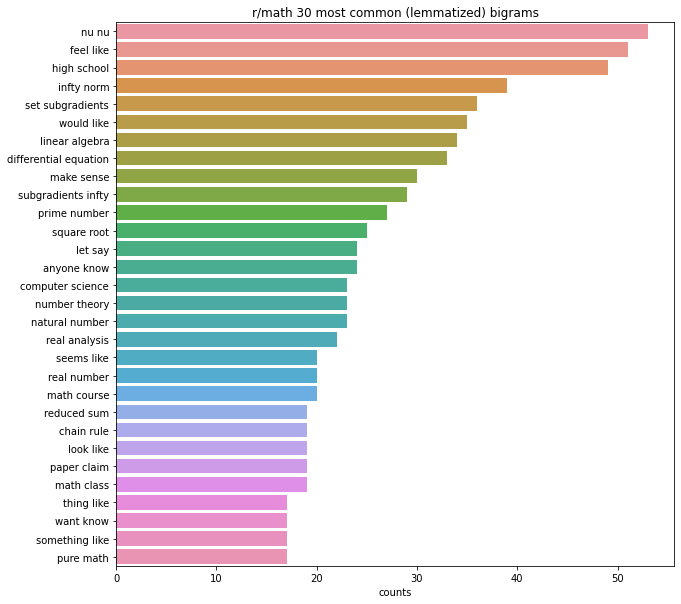

In [53]:
# Top math bigrams
math_bigrams = df_0['lem_text']
math_bigrams = cvec.fit_transform(df_0['lem_text'])
math_bigrams = pd.DataFrame(math_bigrams.todense(), 
                          columns=cvec.get_feature_names())

top_math_bigrams = pd.DataFrame(math_bigrams.sum().sort_values(ascending=False).head(max_words), columns = ['counts'])

plt.figure(figsize = (10,10))
sns.set_color_codes("pastel")
sns.barplot(data=top_math_bigrams, y = top_math_bigrams.index, x = 'counts')
plt.title('r/math 30 most common (lemmatized) bigrams')

Text(0.5, 1.0, 'r/physics 30 most common (lemmatized) bigrams')

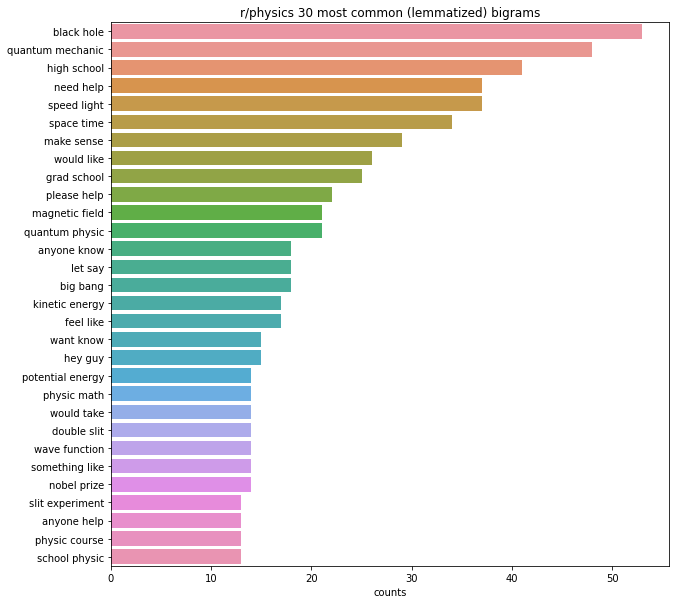

In [54]:
# Top physics bigrams
physics_bigrams = df_1['lem_text']
physics_bigrams = cvec.fit_transform(df_1['lem_text'])
physics_bigrams = pd.DataFrame(physics_bigrams.todense(), 
                          columns=cvec.get_feature_names())

top_physics_bigrams = pd.DataFrame(physics_bigrams.sum().sort_values(ascending=False).head(max_words), columns = ['counts'])

plt.figure(figsize = (10,10))
sns.set_color_codes("pastel")
sns.barplot(data=top_physics_bigrams, y = top_physics_bigrams.index, x = 'counts')
plt.title('r/physics 30 most common (lemmatized) bigrams')

The bigrams seemt to carry much more information than single words, we see distinctive subject-related words such as 'linear algebra' and 'black hole' show up. These will likely be very useful when it comes to classification, which we move onto in the next file.

Text(0.5, 1.0, 'Top r/physics Bigrams')

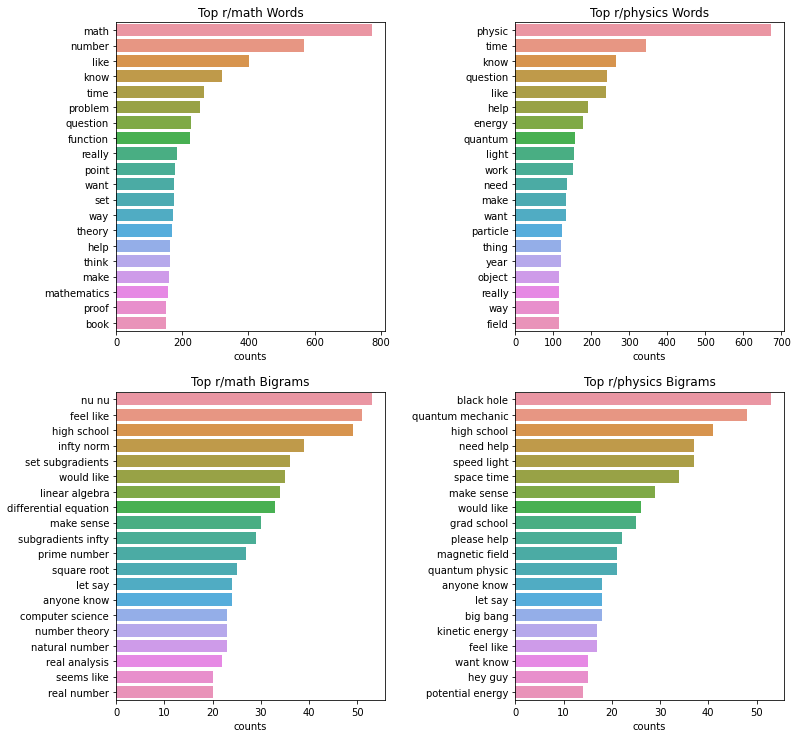

In [76]:
fig, axes = plt.subplots(2,2, figsize = (10,10))
fig.tight_layout(w_pad=10.0, h_pad=4.0)
sns.barplot(data=top_math_words[:20], y = top_math_words.index[:20], x = 'counts', ax = axes[0,0]).set_title('Top r/math Words')
sns.barplot(data=top_math_bigrams[:20], y = top_math_bigrams.index[:20], x = 'counts', ax = axes[1,0]).set_title('Top r/math Bigrams')
sns.barplot(data=top_physics_words[:20], y = top_physics_words.index[:20], x = 'counts', ax = axes[0,1]).set_title('Top r/physics Words')
sns.barplot(data=top_physics_bigrams[:20], y = top_physics_bigrams.index[:20], x = 'counts', ax = axes[1,1]).set_title('Top r/physics Bigrams')

In [44]:
top_math_words

,counts
nu nu,53
feel like,51
high school,49
infty norm,39
set subgradients,36
would like,35
linear algebra,34
differential equation,33
make sense,30
subgradients infty,29
